In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
def S295(freqs):
    a0 = 1.4866 
    a1 = -0.7871
    a2 = -0.3440
    a3 = 0.0749
    f = freqs * 1.e-9
    logf = np.log10(f)
    logS = a0 + a1*logf + a2*logf**2 + a3*logf**3
    return 10.**(logS)

In [4]:
fnames = glob.glob('/data2/GBT/*295/OnOff/*/*rfireduced.npz')
fnames.sort()
print len(fnames)

32


In [5]:
fnames

['/data2/GBT/3C295/OnOff/scan39.raw.vegas/scan39.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan39.raw.vegas/scan39.raw.vegas.B.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan39.raw.vegas/scan39.raw.vegas.C.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan39.raw.vegas/scan39.raw.vegas.D.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan40.raw.vegas/scan40.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan40.raw.vegas/scan40.raw.vegas.B.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan40.raw.vegas/scan40.raw.vegas.C.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan40.raw.vegas/scan40.raw.vegas.D.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan7.raw.vegas/scan7.raw.vegas.A.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan7.raw.vegas/scan7.raw.vegas.B.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan7.raw.vegas/scan7.raw.vegas.C.fits.rfireduced.npz',
 '/data2/GBT/3C295/OnOff/scan7.raw.vegas/scan7.raw.vegas.D.fits.rfireduced.npz',
 '/data2/GBT

In [9]:
def get_freqs_pdiode(k=0, show=True):
    x = np.load(fnames[k])
    y = np.load(fnames[k+4])
    print fnames[k]
    print fnames[k+4]
    if np.any(x['valid'] ^ y['valid']):
        print "CHECK MASK"
    mask = x['valid']
    freqs = x['freqs']
    freqs = freqs[mask]

    if x['source'] == 'ON' and y['source'] == 'OFF':
        onSonD = x['xxon']
        onSoffD = x['xxoff']
        offSonD = y['xxon']
        offSoffD = y['xxoff']
    elif x['source'] == 'OFF' and y['source'] == 'ON':
        onSonD = y['xxon']
        onSoffD = y['xxoff']
        offSonD = x['xxon']
        offSoffD = x['xxoff']
    else:
        print "DISASTER"
    
    Psource = S295(freqs)
    gain = np.nanmean(onSoffD[200:,mask] - offSoffD[200:,mask], 0) / Psource
    Pdiode = np.nanmean(offSonD[200:,mask] - offSoffD[200:,mask], 0) / gain
    if show:
        figure()
        plot(freqs, np.nanmean(onSonD[200:,mask], 0), label='onSonD')
        plot(freqs, np.nanmean(onSoffD[200:,mask], 0), label='onSoffD')
        plot(freqs, np.nanmean(offSonD[200:,mask], 0), label='offSonD')
        plot(freqs, np.nanmean(offSoffD[200:,mask], 0), label='offSoffD')
        legend()
        figure()
        plot(freqs, Pdiode)
        xlabel('frequency')
        ylabel('Jy')
    return freqs, Pdiode

/data2/GBT/3C295/OnOff/scan39.raw.vegas/scan39.raw.vegas.A.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan40.raw.vegas/scan40.raw.vegas.A.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan39.raw.vegas/scan39.raw.vegas.B.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan40.raw.vegas/scan40.raw.vegas.B.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan39.raw.vegas/scan39.raw.vegas.C.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan40.raw.vegas/scan40.raw.vegas.C.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan39.raw.vegas/scan39.raw.vegas.D.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan40.raw.vegas/scan40.raw.vegas.D.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan7.raw.vegas/scan7.raw.vegas.A.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan8.raw.vegas/scan8.raw.vegas.A.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan7.raw.vegas/scan7.raw.vegas.B.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan8.raw.vegas/scan8.raw.vegas.B.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan7.raw.vegas/scan7.raw.vegas.C.fit

(15, 40)

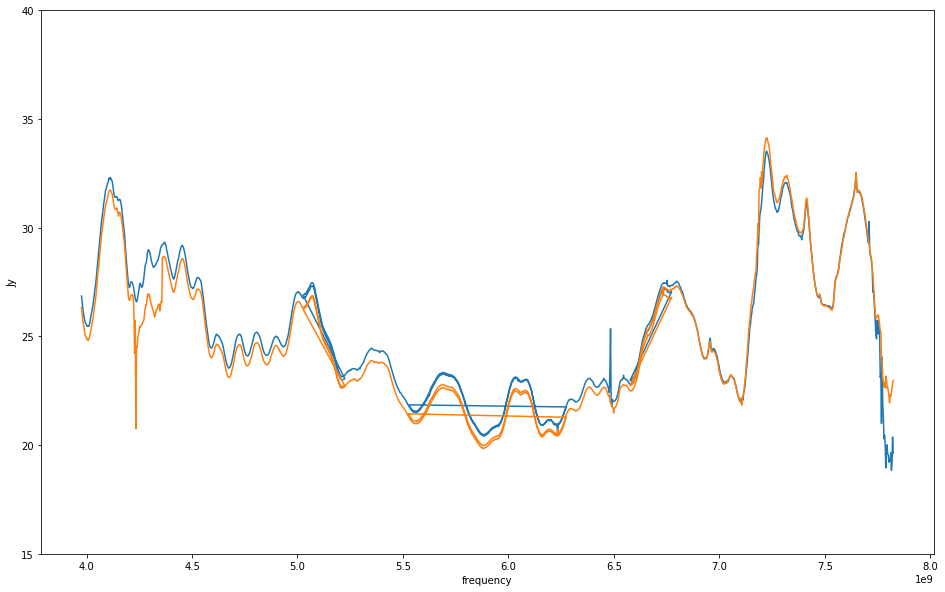

In [16]:
freqs = []
diodes = []
for k in range(4):
    f, p = get_freqs_pdiode(k, show=False)
    freqs = np.concatenate([freqs, f])
    diodes = np.concatenate([diodes, p])
np.save('highnoise_diode_calibration_3C295_01_1', [freqs, diodes])
figsize(16, 10)
plot(freqs, diodes)

freqs = []
diodes = []
for k in range(4):
    f, p = get_freqs_pdiode(k+8, show=False)
    freqs = np.concatenate([freqs, f])
    diodes = np.concatenate([diodes, p])
np.save('highnoise_diode_calibration_3C295_01_0', [freqs, diodes])
plot(freqs, diodes)
xlabel('frequency')
ylabel('Jy')
ylim(15, 40)

/data2/GBT/3C295/OnOff/scan_02_6.raw.vegas/scan_02_6.raw.vegas.A.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan_02_7.raw.vegas/scan_02_7.raw.vegas.A.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan_02_6.raw.vegas/scan_02_6.raw.vegas.B.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan_02_7.raw.vegas/scan_02_7.raw.vegas.B.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan_02_6.raw.vegas/scan_02_6.raw.vegas.C.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan_02_7.raw.vegas/scan_02_7.raw.vegas.C.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan_02_6.raw.vegas/scan_02_6.raw.vegas.D.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan_02_7.raw.vegas/scan_02_7.raw.vegas.D.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan_03_6.raw.vegas/scan_03_6.raw.vegas.A.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan_03_7.raw.vegas/scan_03_7.raw.vegas.A.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan_03_6.raw.vegas/scan_03_6.raw.vegas.B.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan_03_7.raw.vegas/scan_03_7.raw.vegas.B.

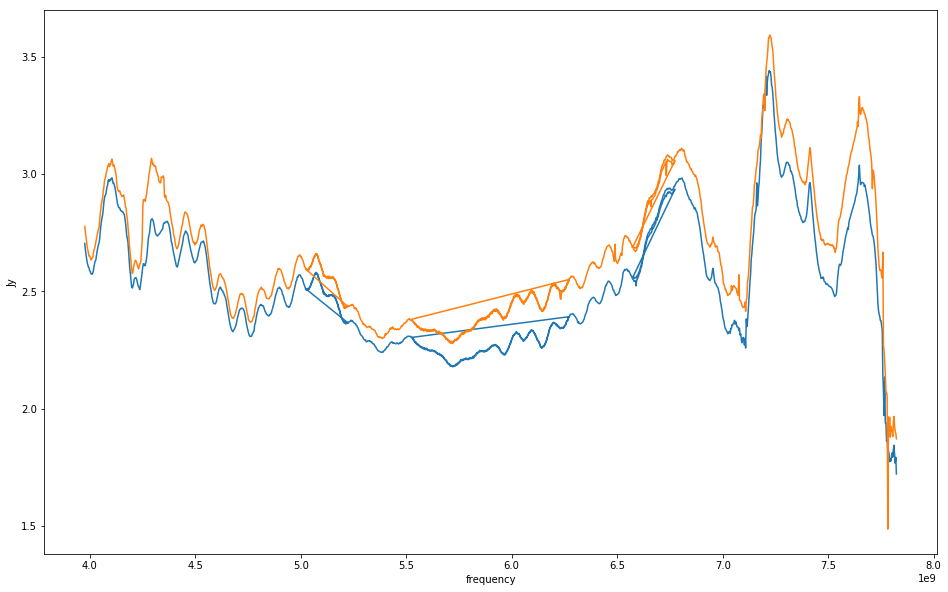

In [15]:
freqs = []
diodes = []
for k in range(4):
    f, p = get_freqs_pdiode(k+16, show=False)
    freqs = np.concatenate([freqs, f])
    diodes = np.concatenate([diodes, p])
np.save('lownoise_diode_calibration_3C295_02', [freqs, diodes])
plot(freqs, diodes)

freqs = []
diodes = []
for k in range(4):
    f, p = get_freqs_pdiode(k+24, show=False)
    freqs = np.concatenate([freqs, f])
    diodes = np.concatenate([diodes, p])
np.save('lownoise_diode_calibration_3C295_03', [freqs, diodes])
plot(freqs, diodes)
xlabel('frequency')
ylabel('Jy')